In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd # 데이터 전처리
import numpy as np # 데이터 전처리
import random #데이터 전처리
from pandas import DataFrame #데이터 전처리
from collections import Counter #데이터 전처리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm  # 폰트 관련 용도
# 한글 폰트 설치
# https://pinkwink.kr/1255
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

from tqdm import tqdm #시간 측정용

from sklearn.feature_extraction.text import CountVectorizer # model setting
from sklearn.model_selection import train_test_split  # model setting

from sklearn.naive_bayes import MultinomialNB  # model 관련
from sklearn.metrics import roc_auc_score  # model 성능 확인
from sklearn.metrics import auc

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [3]:
!ls "/content/drive/My Drive/Data_Science/Dacon/14th 금융문자 분석 경진대회"

Data  filedown.zip  첫시도.ipynb  Modeling  Submission


In [4]:
cd /content/drive/My Drive/Data_Science/Dacon/14th 금융문자 분석 경진대회/Data 

/content/drive/My Drive/Data_Science/Dacon/14th 금융문자 분석 경진대회/Data


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv("public_test.csv")
submission = pd.read_csv('submission_제출양식.csv')

In [0]:
train.shape, test.shape

((295945, 4), (1626, 3))

In [0]:
train.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


# EDA

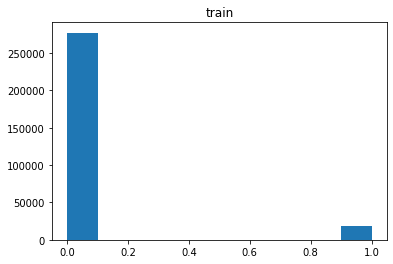

Counter({0: 277242, 1: 18703})


In [0]:
plt.hist(train.smishing) # 스미싱문자비율
plt.title('train')
plt.show()
print(Counter(train['smishing']))

In [0]:
train[train.smishing==1].tail(10) # 스미싱 문자만 훑어보기

,id,year_month,text,smishing
295907,336337,2018-12,안녕하십니XXX팀장입니다!!Merry X-masHappy New year !!올 한...,1
295913,336343,2018-12,(광고) XXX항상 저희 XXX을 이용해주셔서 감사합니다.2018년 하반기 마지막 ...,1
295915,336345,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1
295917,336347,2018-12,(광고)XXX행 상품 안내안녕하세요.저희 XXX 에서 신규 상품 출시되며 채무통합 ...,1
295924,336354,2018-12,안녕하세요 오XXX연락드려요 CT은행 대출진행담당자 였던XXX팀장입니다타 금융사로...,1
295927,336357,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1
295932,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1
295934,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1
295936,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1
295937,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1


In [0]:
train[train.smishing==1].iloc[0]['text'] # 샘플

'(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자격기준과 심사기준이 완화되어 상품에 대해 간단하게 상품정보 전달드립니다.수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신거부 목록에 등록을 시켜 두번 다시 발송되지 않도록 조치를 취해드리겠습니다.신청방법:  XXX-XXX-XXX  터치하셔서 문자로 상담 또는 00시 00분 상담이라고 답장을 보내주시거나 전화를 주시면 친절하고 안전한 상담으로 도움드리겠습니다.카카오톡 상담서비스 시행중 citibankloan친구추가 후 상담신청이런 분들께 권해드립니다.1. 시중은행권에서 기존한도를 모두 사용 중이신 분.2. 기대출의 원리금 균등방식으로 인해 월 불입금액이 부담스러우신 분.3. 총 채무금액은 작으나 채무건수가 많아서 관리가 안 되시는 XXX고객님들께 말씀드립니다. 높은 금리 때문에 힘들다고 느끼셨을 때 대출이 필요하실 때 언제나XXX 고객님들 뒤에서 든든한 파트너로서 도와드리겠습니다.당행 상품특징1. 당행 거래가 없으셔도 진행가능.2. 시중은행권보다 높은 한도.3. 자체 등급으로 판단하므로 낮은신용자도 진행가능.4. 부채가 많다면 부채 통합상품으로 전환가능.5. 원리금 균등방식을 이자만 납입하는 만기일시로 전환가능.6. 가상 조회를 통해 한도 및 금리를 한 번에 확인가능.당행 상품안내1. 직장인전용 신용상품한도: 최대 1억 4000만 원까지.금리: 최저 2.97%자격: XXX은행 자체 등급과 기업 리스트에 따라 차등적용.2. 채무통합 전환상품한도: 연봉 대비 300%까지.금리: 최저 2.97%자격: XXX은행 자체 등급과 기업 리스트에 따라 차등적용.3. 새 희망 홀씨한도: 최대 2500만 원.금리: 8.68%12%자격: 연봉 4000만 원 이하 고객 대상으로 XXX 자체 등급에 따라(광고)XXX'

- (광고)라는 단어가 자주 나오므로 '광고'랑 구분해서 토크나이징 필요
- (광고) 유무로만 예측해도 어느정도 예측정확도는 보장될 듯

**(광고) 유무로 실험해봄**

In [0]:
train['ad'] = np.where(train['text'].str.slice(stop=4)=='(광고)',1,0)
test['smishing'] = np.where(test['text'].str.slice(stop=4)=='(광고)',1,0)

In [0]:
roc_auc_score(train['smishing'], train['ad'])

0.9089874965633479

In [0]:
submission['smishing'] = test['smishing']

In [0]:
# baseline
submission.to_csv('../Submission/sub_baseline(광고).csv', index=False)

In [0]:
del train['ad']
del test['smishing']

실험결과
- train: 0.908 
- test: 0.643

## Mecab 설치

In [6]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [7]:
ls

 모델링1_방법1_y_train.pickle   public_test.csv           train.csv
 Mecab-ko-for-Google-Colab/    'sub_baseline(광고).csv'
 model_weights.h5               submission_제출양식.csv


In [8]:
cd Mecab-ko-for-Google-Colab/

/content/drive/My Drive/Data_Science/Dacon/14th 금융문자 분석 경진대회/Data/Mecab-ko-for-Google-Colab


In [9]:
ls

images/                             README.md         y_train.pickle
install_mecab-ko_on_colab190912.sh  sequences.pickle


In [10]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 147kB/s 
     |████████████████████████████████| 2.3MB 43.3MB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-02-05 13:48:43--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.0, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

## Mecab 사용

In [0]:
import konlpy
from konlpy.tag import Mecab

tokenizer = Mecab() # setting tokenizer using Mecab()

In [0]:
smishing_0 = train[train.smishing==0]
smishing_1 = train[train.smishing==1]

In [13]:
train_doc0 = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( smishing_0['text'], smishing_0['smishing'] ) )  ]
train_doc1 = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( smishing_1['text'], smishing_1['smishing'] ) )  ]

277242it [01:41, 2724.87it/s]
18703it [00:40, 461.67it/s]


## EDA 계속

### **문자 길이 비교**

In [0]:
# 일반 문자와 스미싱문자의 길이 비교
text_len0 = []
text_len1 = []
for i in range(len(train_doc0)):
  text_len0.append(len(train_doc0[i][0]))

for i in range(len(train_doc1)):
  text_len1.append(len(train_doc1[i][0]))

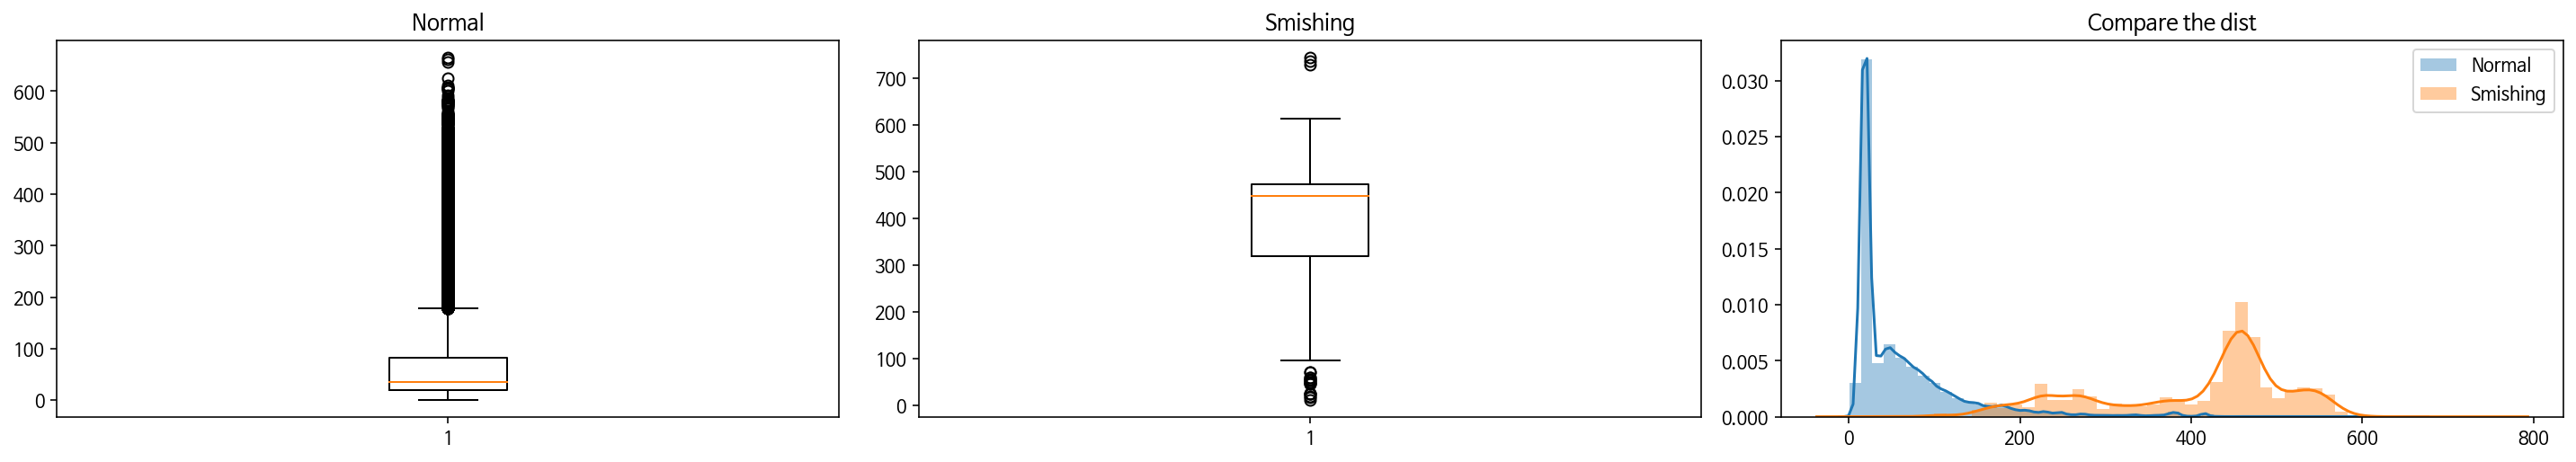

In [0]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax1.boxplot(text_len0)
ax2.boxplot(text_len1)
sns.distplot(text_len0, ax=ax3, label='Normal')
sns.distplot(text_len1, ax=ax3, label='Smishing')
plt.legend()
ax1.set_title('Normal')
ax2.set_title('Smishing')
ax3.set_title('Compare the dist')
plt.tight_layout()

In [0]:
count=0
for i in range(len(text_len0)):
  if text_len0[i] > 200:
     count+=1
print(count / len(text_len0))

0.05083284639412499


- 스미싱문자가 평균적으로 확연히 길다(변수로 활용 가능)

**두번째 실험: 문자길이로 구분**

In [0]:
train_doc = [ tokenizer.pos(x) for x in train['text'] ]
test_doc = [ tokenizer.pos(x) for x in test['text'] ]

In [0]:
train_len = []
test_len = []
for i in range(len(train_doc)):
  train_len.append(len(train_doc[i]))

for i in range(len(test_doc)):
  test_len.append(len(test_doc[i]))

In [0]:
train['ad'] = np.where(train['text'].str.slice(stop=4)=='(광고)',1,0)
test['ad'] = np.where(test['text'].str.slice(stop=4)=='(광고)',1,0)
train['len'] = train_len
test['len'] = test_len

In [0]:
from sklearn.ensemble import RandomForestClassifier
X = train[['ad','len']]
y = train['smishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2 ,random_state=2019)
rfc = RandomForestClassifier(n_estimators=100, class_weight= 'balanced', criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
pred = rfc.predict(X_test)
roc_auc_score(y_test, pred)

0.963677050863495

In [0]:
submission['smishing'] = rfc.predict(test[['ad','len']])

In [0]:
# baseline2
submission.to_csv('../Submission/sub_baseline2(광고,길이).csv', index=False)

실험결과(n_estimators = 100 / 1000)
- train: 0.96428 / 0.96438
- test: 0.7147

### **빈도 상위 50위 토큰 비교**

In [0]:
noun_adj_adv_list0=[] 
stopwords = ['.', '을', '를', '이', '가','은', '는'] #필요없는 단어 리스트

for sentence in train_doc0 : 
  for word, tag in sentence[0] : 
    if word not in stopwords: 
      noun_adj_adv_list0.append(word) 

noun_adj_adv_list1=[] 
stopwords = ['.', '을', '를', '이', '가','은', '는'] #필요없는 단어 리스트

for sentence in train_doc1 : 
  for word, tag in sentence[0] : 
    if word not in stopwords: 
      noun_adj_adv_list1.append(word) 

In [0]:
count0 = Counter(noun_adj_adv_list0)
count1 = Counter(noun_adj_adv_list1)

In [0]:
import itertools
# 빈도 상위 50위 단어만 시각화
top_50_0 = dict(itertools.islice(dict(count0.most_common()).items(), 50))
top_50_1 = dict(itertools.islice(dict(count1.most_common()).items(), 50))

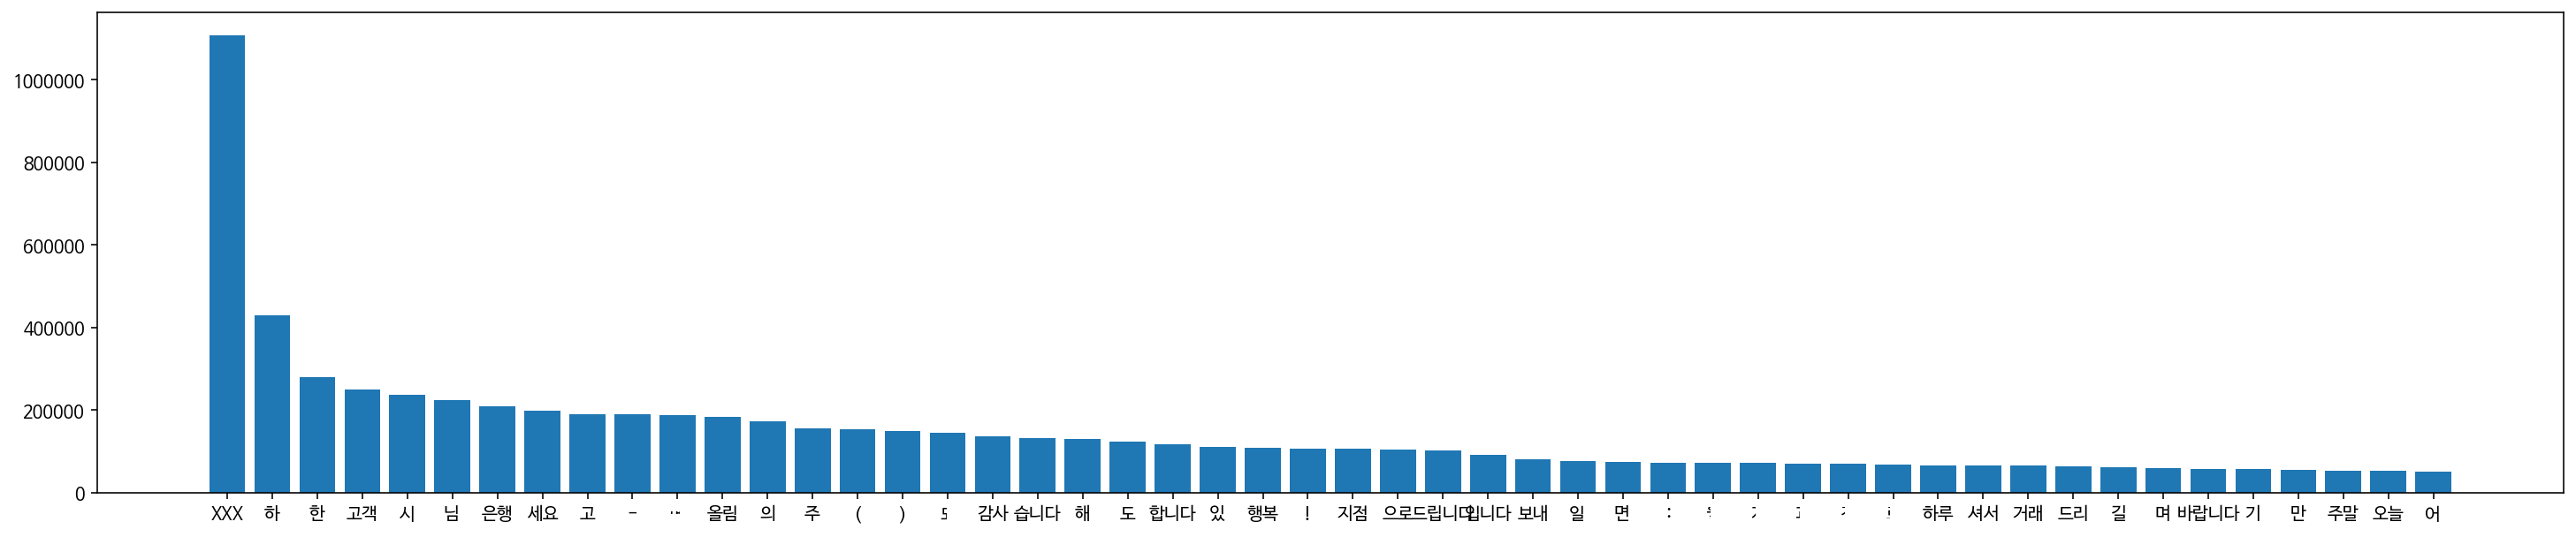

In [0]:
plt.figure(figsize=(25,5))
plt.bar(x=top_50_0.keys(), height=top_50_0.values())

#plt.xticks(rotation=45)
plt.show()

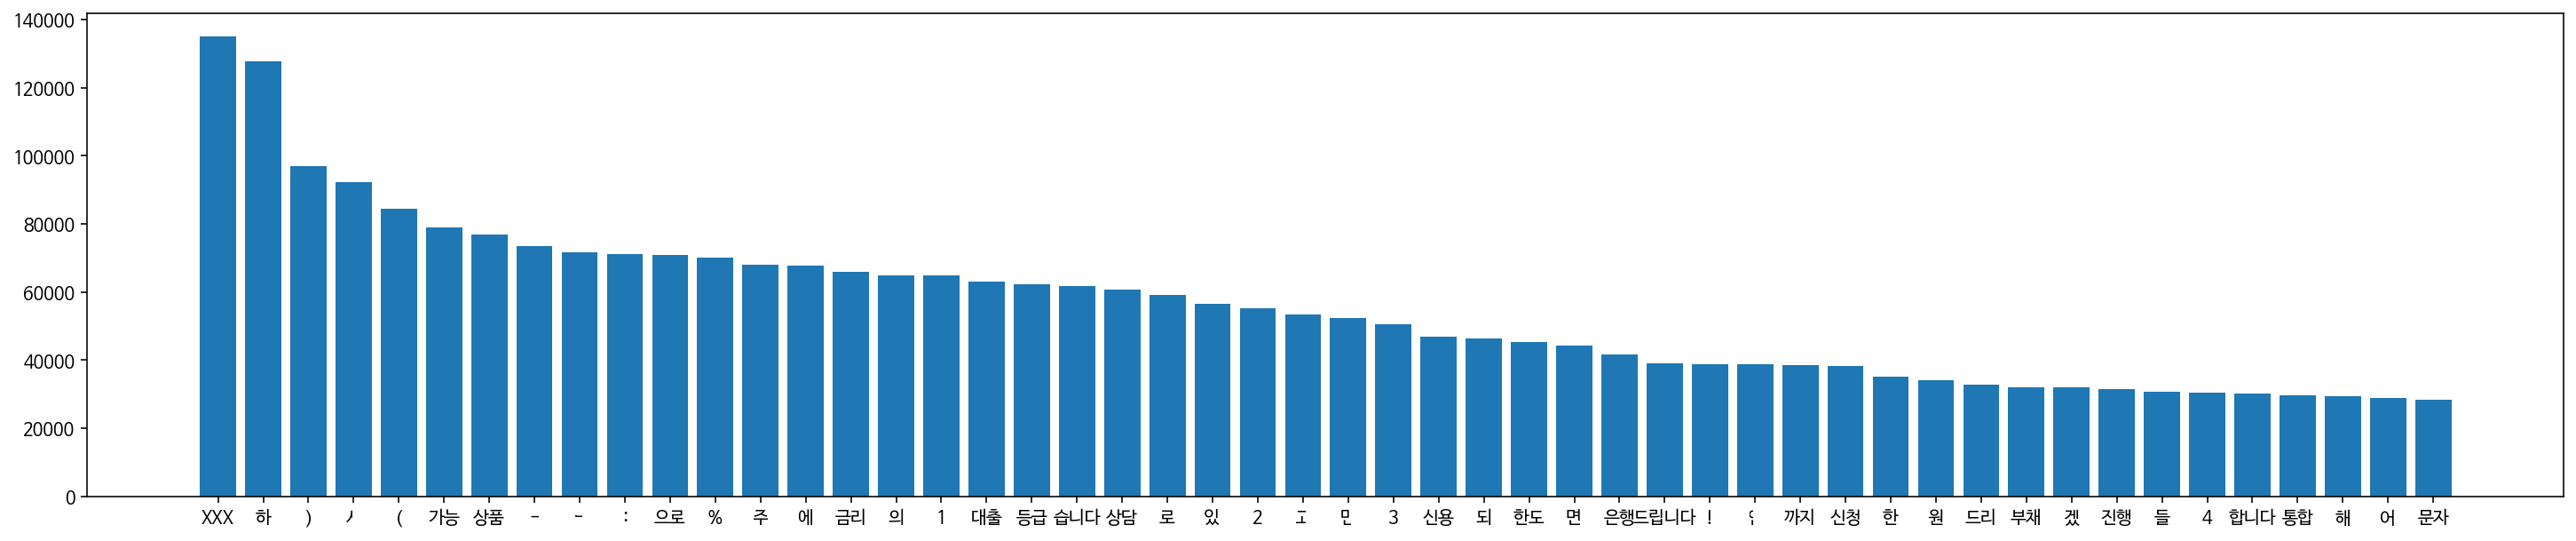

In [0]:
plt.figure(figsize=(25,5))
plt.bar(x=top_50_1.keys(), height=top_50_1.values())
#plt.xticks(rotation=45)
plt.show()

### **기간별 상위 단어 빈도 비교**
 - test 기간인 1~4월에 쓰이는 단어가 다른 시기와 차이가 있는지 확인해본다.
 - 특히 연초에는 새해 관련 특수주제가 많을 것이므로 차이가 있으리라 추측한다.



In [0]:
# month 변수 생성
train['year_month'] = pd.to_datetime(train['year_month'])
train['month'] = train.year_month.dt.month
test['year_month'] = pd.to_datetime(test['year_month'])
test['month'] = test.year_month.dt.month 

In [0]:
# train - 스미싱여부, 4월 이하, 초과로 구분
tr_normal_p1 = train[(train.month<=4) & (train.smishing==0)]
tr_normal_p2 = train[(train.month>4) & (train.smishing==0)]
tr_smishing_p1 = train[(train.month<=4) & (train.smishing==1)]
tr_smishing_p2 = train[(train.month>4) & (train.smishing==1)]

In [16]:
normal_p1_doc = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( tr_normal_p1['text'], tr_normal_p1['smishing'] ) )  ]
normal_p2_doc = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( tr_normal_p2['text'], tr_normal_p2['smishing'] ) )  ]
smishing_p1_doc = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( tr_smishing_p1['text'], tr_smishing_p1['smishing'] ) )  ]
smishing_p2_doc = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( tr_smishing_p2['text'], tr_smishing_p2['smishing'] ) )  ]
test_doc = [ tokenizer.pos(x) for x in tqdm( test['text'] )  ]

97526it [00:32, 2958.84it/s]
179716it [01:08, 2618.29it/s]
5237it [00:11, 447.28it/s]
13466it [00:27, 484.38it/s]
100%|██████████| 1626/1626 [00:01<00:00, 1360.27it/s]


In [0]:
# 문자 주제의 변화를 알아보기 위해 고유의 의미를 가진 명사, 동사, 형용사 위주로 추출
def make_word_list(doc, test= False, stopwords = ['.', '을', '를', '이', '가','은', '는'],
                   using_tags = ['NNG', 'NNBC', 'VV','VA','MAG']):
  word_list = []
  if test == False:
    for sentence in doc : 
      for word, tag in sentence[0] : 
        if (word not in stopwords) & (tag in using_tags): 
          word_list.append(word)

  if test == True:
    for sentence in doc: 
      for word, tag in sentence: 
        if (word not in stopwords) & (tag in using_tags): 
          word_list.append(word) 
  return word_list

In [0]:
# 단어 리스트
normal_p1_list = make_word_list(normal_p1_doc, test=False, stopwords=  ['.', '을', '를', '이', '가','은', '는','XXX'])
normal_p2_list = make_word_list(normal_p2_doc, test=False, stopwords=  ['.', '을', '를', '이', '가','은', '는','XXX'])
smishing_p1_list = make_word_list(smishing_p1_doc, test=False, stopwords=  ['.', '을', '를', '이', '가','은', '는','XXX'])
smishing_p2_list = make_word_list(smishing_p2_doc, test=False, stopwords=  ['.', '을', '를', '이', '가','은', '는','XXX'])
test_list = make_word_list(test_doc, test=True, stopwords=  ['.', '을', '를', '이', '가','은', '는','XXX'])

In [0]:
# 빈도 계산
normal_p1_count = Counter(normal_p1_list)
normal_p2_count = Counter(normal_p2_list)
smishing_p1_count = Counter(smishing_p1_list)
smishing_p2_count = Counter(smishing_p2_list)
test_count = Counter(test_list)

In [0]:
import itertools
# 빈도 상위 50위 단어만 시각화
normal_p1_top_50 = dict(itertools.islice(dict(normal_p1_count.most_common()).items(), 50))
normal_p2_top_50 = dict(itertools.islice(dict(normal_p2_count.most_common()).items(), 50))
smishing_p1_top_50 = dict(itertools.islice(dict(smishing_p1_count.most_common()).items(), 50))
smishing_p2_top_50 = dict(itertools.islice(dict(smishing_p2_count.most_common()).items(), 50))
test_top_50 = dict(itertools.islice(dict(test_count.most_common()).items(), 50))

In [0]:
# 단어 개수
len(normal_p1_count), len(normal_p2_count), len(smishing_p1_count), len(smishing_p2_count), len(test_count)  

(13573, 17899, 1976, 2786, 4607)

In [0]:
all_top_word = [normal_p1_top_50, normal_p2_top_50, smishing_p1_top_50, smishing_p2_top_50, test_top_50]

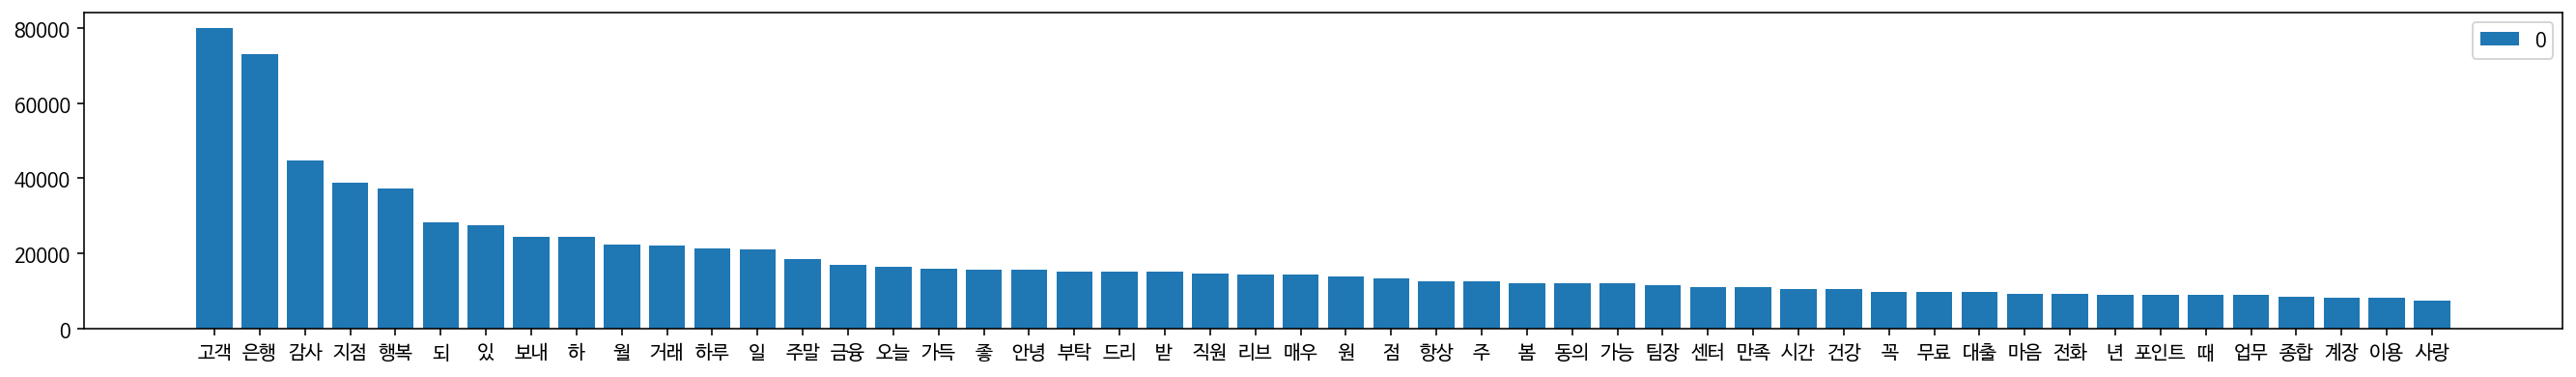

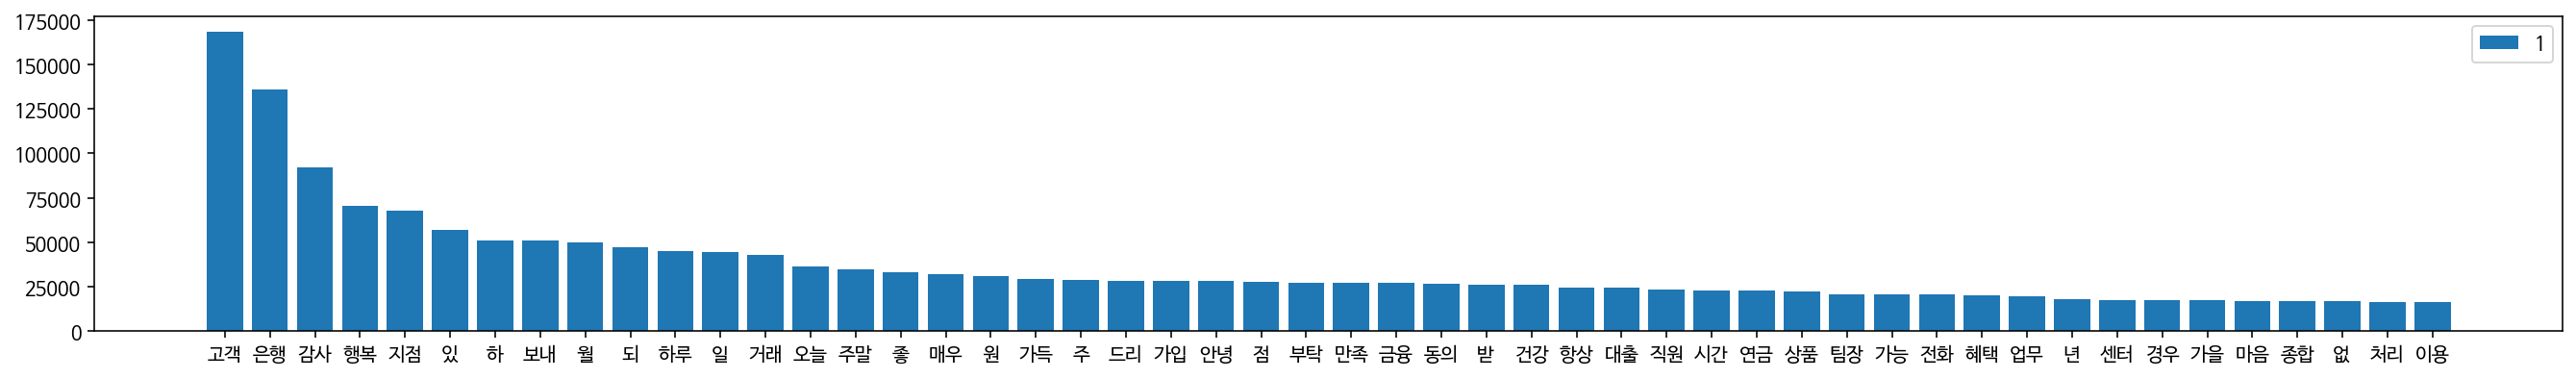

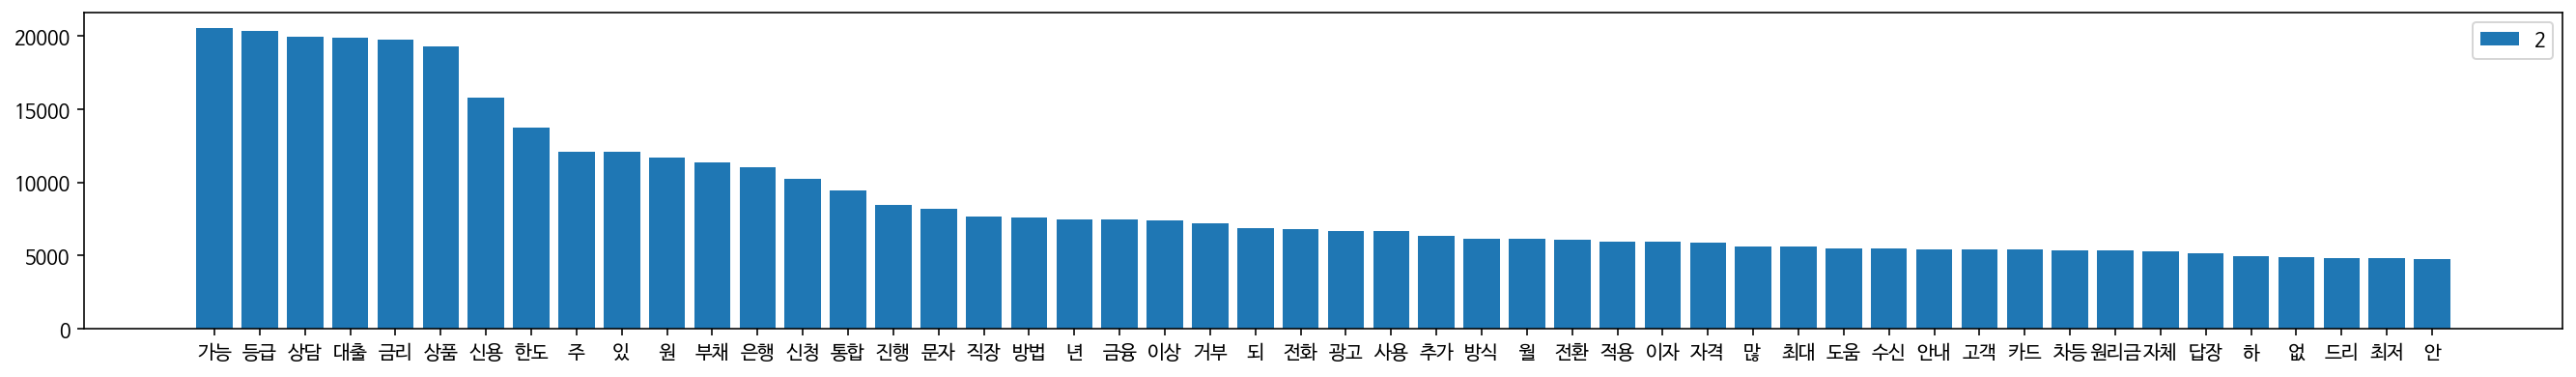

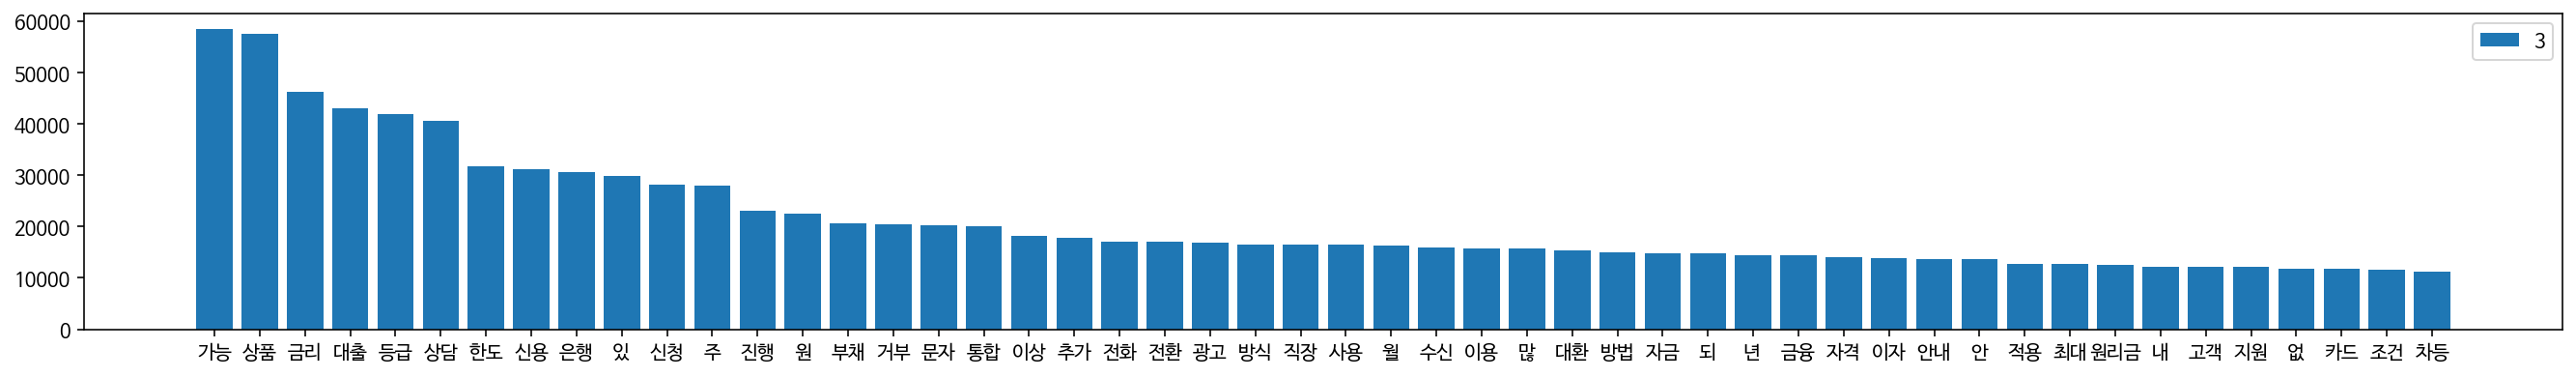

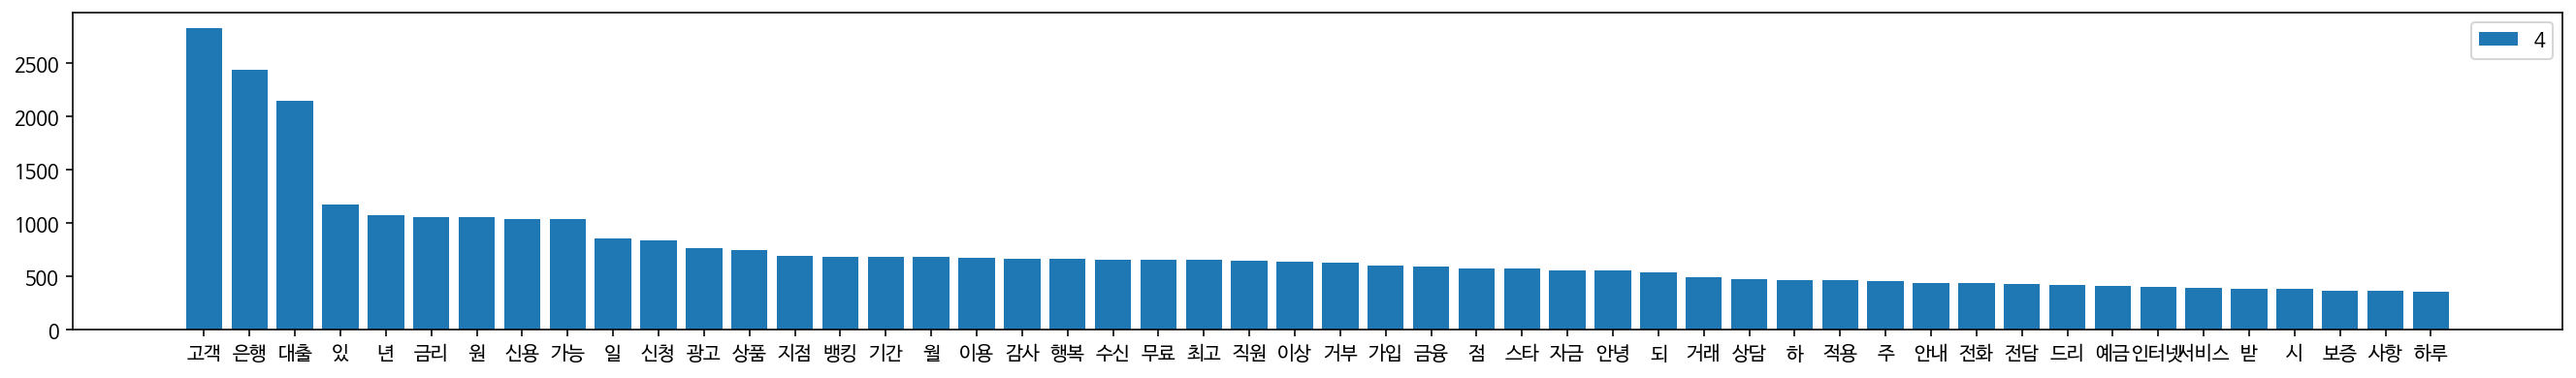

In [0]:
for i in range(5):
  plt.figure(figsize=(23,3))
  plt.bar(x=all_top_word[i].keys(), height=all_top_word[i].values(), label=str(i))
  #plt.xticks(rotation=45)
  plt.legend()
  plt.show()

In [0]:
print('일반문자 단어 차집합(1~4월 - 5~12월): {}'.format(set(all_top_word[0].keys()).difference(set(all_top_word[1].keys()))))
print('일반문자 단어 차집합(5~12월 - 1~4월): {}'.format(set(all_top_word[1].keys()).difference(set(all_top_word[0].keys()))))
print('스미싱문자 단어 차집합(1~4월 - 5~12월): {}'.format(set(all_top_word[2].keys()).difference(set(all_top_word[3].keys()))))
print('스미싱문자 단어 차집합(5~12월 - 1~4월): {}'.format(set(all_top_word[3].keys()).difference(set(all_top_word[2].keys()))))

일반문자 단어 차집합(1~4월 - 5~12월): {'포인트', '무료', '꼭', '리브', '봄', '계장', '때', '사랑'}
일반문자 단어 차집합(5~12월 - 1~4월): {'상품', '없', '연금', '처리', '가입', '혜택', '가을', '경우'}
스미싱문자 단어 차집합(1~4월 - 5~12월): {'답장', '하', '자체', '도움', '최저', '드리'}
스미싱문자 단어 차집합(5~12월 - 1~4월): {'조건', '대환', '내', '지원', '이용', '자금'}


- 일반 문자의 경우 큰 차이 없음
- 스미싱 문자는 빈도, 순위의 차이는 있으나, 단어 리스트는 비슷

**결론** : 시기에 따라 문자 주제에 큰 차이는 없다.

### **18년도 후반과 17년도 후반 비교**
- 시간의 흐름에 따라 스미싱문자의 내용이 변하는지 확인
 - 언론에 문자 스타일이 노출됨에 따라, 내용이 갈수록 교묘해질 것으로 예상하여 이러한 비교를 해보았다.

In [0]:
# year 변수 생성
train['year'] = train.year_month.dt.year

In [0]:
# train - 스미싱여부, 4월 이하, 초과로 구분
tr_smishing_17 = train[(train.month>=7) & (train.year==2017) & (train.smishing==1)]
tr_smishing_18 = train[(train.month>=7) & (train.year==2018) & (train.smishing==1)]

In [24]:
smishing_17_doc = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( tr_smishing_17['text'], tr_smishing_17['smishing'] ) )  ]
smishing_18_doc = [ ( tokenizer.pos(x), y ) for x, y in tqdm( zip( tr_smishing_18['text'], tr_smishing_18['smishing'] ) )  ]

4320it [00:09, 441.10it/s]
6971it [00:13, 505.88it/s]


In [0]:
# 단어 리스트
smishing_17_list = make_word_list(smishing_17_doc, test=False, stopwords=  ['.', '을', '를', '이', '가','은', '는','XXX'])
smishing_18_list = make_word_list(smishing_18_doc, test=False, stopwords=  ['.', '을', '를', '이', '가','은', '는','XXX'])
# 빈도 계산
smishing_17_count = Counter(smishing_17_list)
smishing_18_count = Counter(smishing_18_list)

# 빈도 상위 50위 단어만 시각화
smishing_17_top_50 = dict(itertools.islice(dict(smishing_17_count.most_common()).items(), 100))
smishing_18_top_50 = dict(itertools.islice(dict(smishing_18_count.most_common()).items(), 100))
# 리스트화
top_word_1718 = [smishing_17_top_50, smishing_18_top_50, test_top_50]

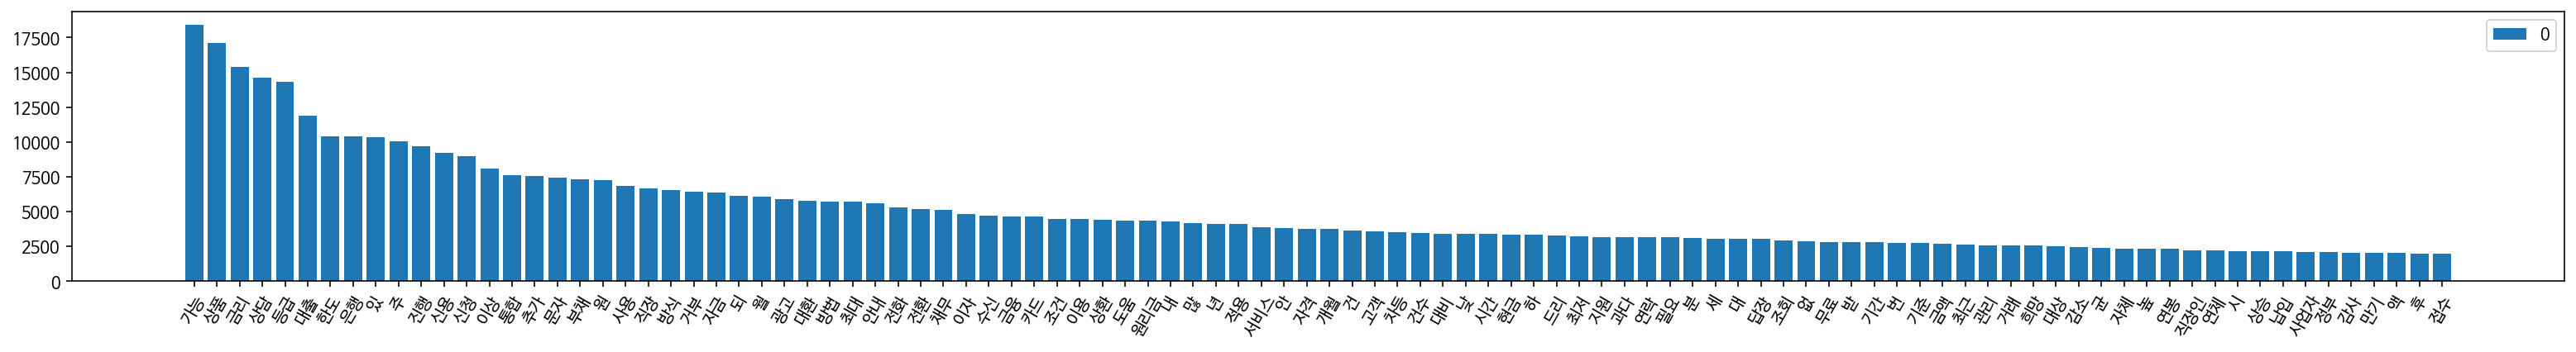

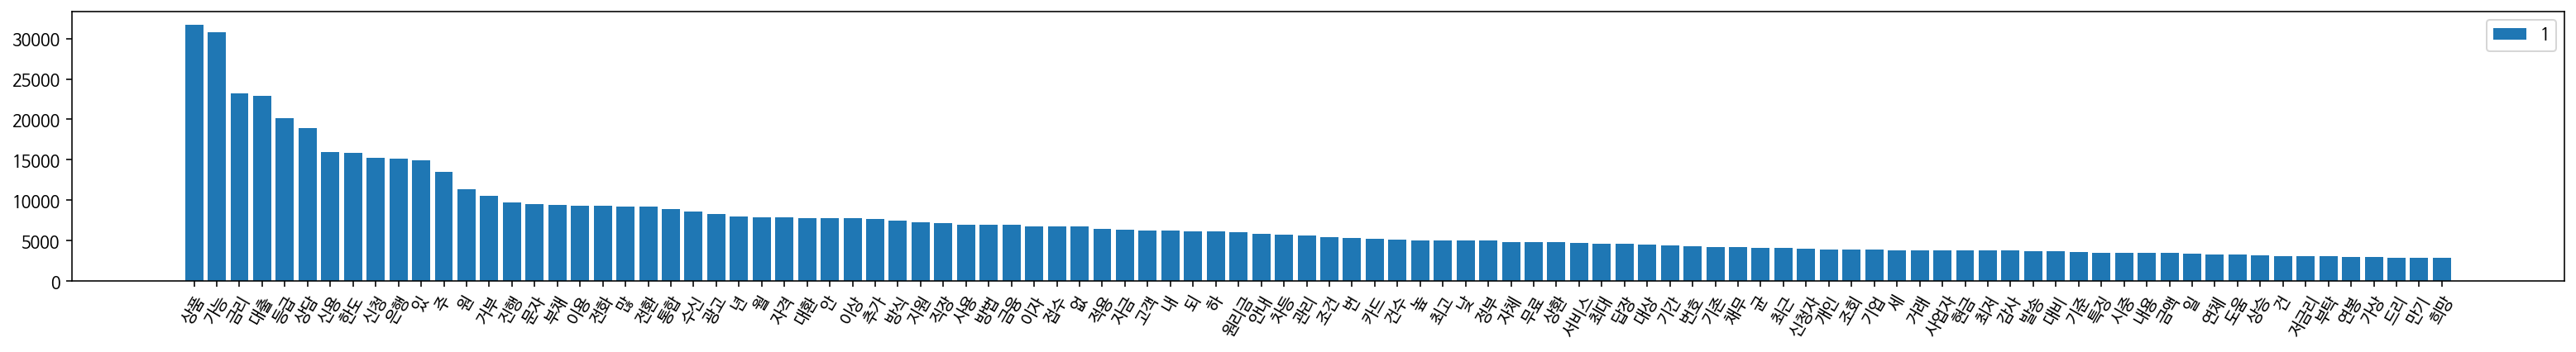

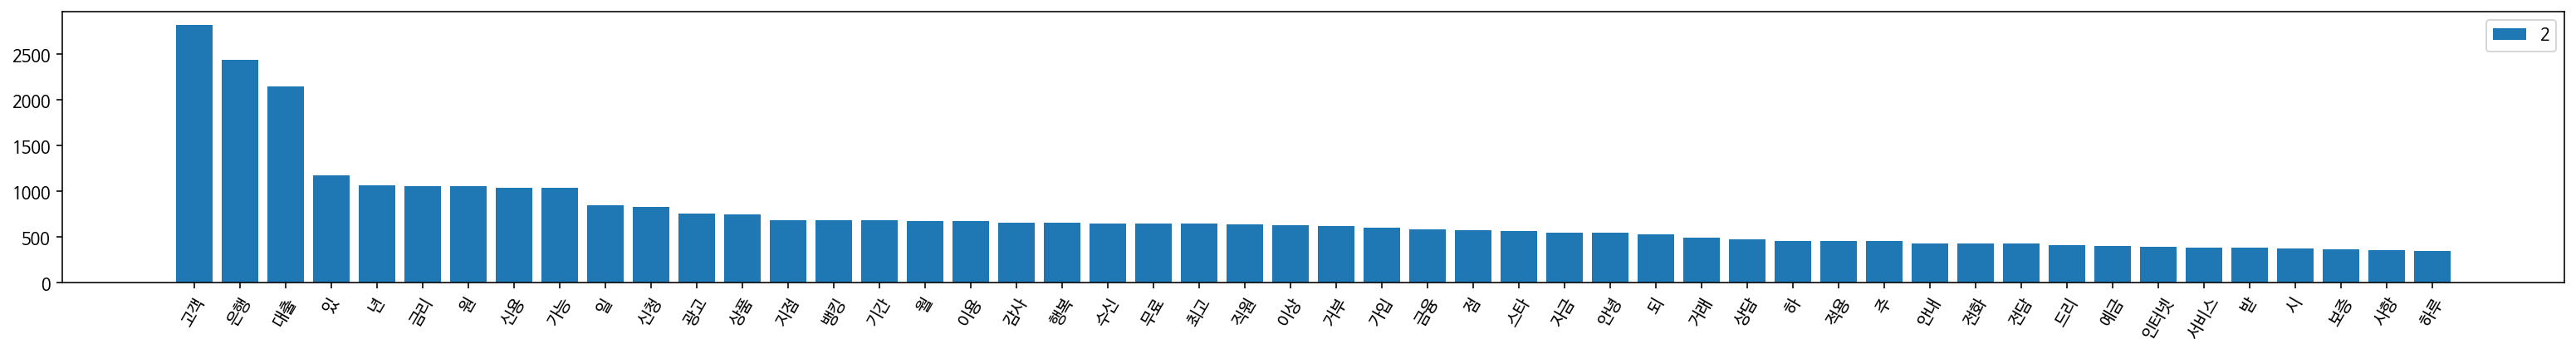

In [26]:
# 17년도 train, 18년도 train, test(19년도 1분기)의 빈도 상위 50개 단어 
for i in range(3):
  plt.figure(figsize=(27,3))
  plt.bar(x=top_word_1718[i].keys(), height=top_word_1718[i].values(), label=str(i) )
  plt.xticks(rotation=60)
  plt.legend()
  plt.show()

In [0]:
print('스미싱문자 차집합(18년도 후반기 - 17년도 후반기): {}'.format(set(top_word_1718[1].keys()).difference(set(top_word_1718[0].keys()))))
print('스미싱문자 차집합(17년도 후반기 - 18년도 후반기): {}'.format(set(top_word_1718[0].keys()).difference(set(top_word_1718[1].keys()))))

스미싱문자 차집합(18년도 후반기 - 17년도 후반기): {'기업', '시중', '최고', '발송', '신청자', '부탁', '가상', '번호', '저금리', '일', '기존', '개인', '특징', '내용'}
스미싱문자 차집합(17년도 후반기 - 18년도 후반기): {'연락', '직장인', '필요', '받', '분', '시', '대', '개월', '감소', '시간', '후', '과다', '납입', '액'}


- 상위로 갈수록 큰 변동은 없다(빈도가 비슷한 하위에서 변동이 있음)
- 그러나 두 기간의 문자 유사성을 정확한 계산식으로 나타내지 못해서 한계가 있다.
- 따라서 18년도 후반기를 Validation set으로 하면 모델의 AUC가 향상되는지 확인할 계획